In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Load Data
users=pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
users_engagement=pd.read_csv('takehome_user_engagement.csv')

In [122]:
users.info(),users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


(None, None)

# Data Wrangling

In [123]:
# Check to see if there's user id 0
users['invited_by_user_id'].isin([0]).value_counts()

False    12000
Name: invited_by_user_id, dtype: int64

In [124]:
users['invited_by_user_id'].fillna(0,inplace=True)

In [125]:
# Use average value to fill null value in column last_session_creation_time
users['last_session_creation_time'].fillna(np.mean(users['last_session_creation_time']),inplace=True)

In [126]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [127]:
#  Merge datasets
users=users.rename(columns={'object_id':'user_id'})
df=users.merge(users_engagement,on='user_id',how='inner')

In [128]:
# Convert to date time object
df['time_stamp']=pd.to_datetime(df['time_stamp'])

In [129]:
# Identify adopted user based on week frequncy count
df['wk'] = df['time_stamp'].dt.week

In [130]:
time_group = df.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")

[10, 42, 63, 69, 81, 82, 87, 146, 153, 160, 168, 197, 202, 203, 209, 230, 245, 263, 297, 310, 322, 445, 471, 483, 509, 510, 529, 535, 553, 564, 603, 605, 639, 669, 679, 680, 724, 728, 754, 772, 783, 804, 845, 882, 885, 901, 906, 912, 934, 937, 943, 980, 1017, 1018, 1027, 1055, 1061, 1072, 1094, 1099, 1128, 1129, 1155, 1196, 1202, 1280, 1320, 1339, 1343, 1345, 1350, 1357, 1368, 1407, 1411, 1421, 1434, 1464, 1472, 1476, 1479, 1485, 1507, 1576, 1617, 1624, 1665, 1693, 1709, 1730, 1754, 1769, 1781, 1783, 1786, 1811, 1821, 1822, 1836, 1865, 1879, 1885, 1941, 2002, 2011, 2013, 2033, 2042, 2074, 2078, 2080, 2103, 2113, 2159, 2171, 2193, 2246, 2253, 2270, 2271, 2286, 2289, 2300, 2316, 2324, 2333, 2339, 2390, 2406, 2425, 2447, 2474, 2490, 2502, 2519, 2539, 2548, 2557, 2566, 2568, 2571, 2604, 2620, 2622, 2647, 2658, 2672, 2723, 2727, 2739, 2744, 2771, 2809, 2832, 2881, 2889, 2895, 2915, 2939, 2979, 3017, 3028, 3032, 3039, 3066, 3067, 3087, 3093, 3112, 3113, 3137, 3139, 3160, 3175, 3180, 3185, 31

In [131]:
time_freq=time_group.drop('wk',axis=1)

In [133]:
df2=df.merge(time_freq,on='user_id',how='left')

In [152]:
adopt=[]
for i in range(len(df2['freq'])):
    if df2['freq'][i]>=3:
        adopt.append(1)
    else:
        adopt.append(0)

In [154]:
df2['adopted user']=adopt

In [157]:
final_df=df2.drop_duplicates(subset=['time_stamp'])

In [158]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207220 entries, 0 to 9096216
Data columns (total 15 columns):
user_id                       207220 non-null int64
creation_time                 207220 non-null object
name                          207220 non-null object
email                         207220 non-null object
creation_source               207220 non-null object
last_session_creation_time    207220 non-null float64
opted_in_to_mailing_list      207220 non-null int64
enabled_for_marketing_drip    207220 non-null int64
org_id                        207220 non-null int64
invited_by_user_id            207220 non-null float64
time_stamp                    207220 non-null datetime64[ns]
visited                       207220 non-null int64
wk                            207220 non-null int64
freq                          207220 non-null int64
adopted user                  207220 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
memory usage: 25.3+ MB


# Machine Learning

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [216]:
# Delete memory heavy,unnecessary, and non integer columns 
final_df=final_df.drop(labels=['name','email','wk','freq','time_stamp','creation_time'],axis=1,errors='ignore')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207220 entries, 0 to 9096216
Data columns (total 9 columns):
user_id                       207220 non-null int64
creation_source               207220 non-null object
last_session_creation_time    207220 non-null float64
opted_in_to_mailing_list      207220 non-null int64
enabled_for_marketing_drip    207220 non-null int64
org_id                        207220 non-null int64
invited_by_user_id            207220 non-null float64
visited                       207220 non-null int64
adopted user                  207220 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 15.8+ MB


In [202]:
# Create target columns and non target column
y=final_df['adopted user']
x=final_df.iloc[:,0:-1]

In [204]:
# Create dummies for non integer column
x=pd.get_dummies(x)

In [205]:
# Create train and testing set 
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [206]:
# Train model
dt=DecisionTreeClassifier()
dt.fit(xlr,ylr)

DecisionTreeClassifier()

In [207]:
# Find feature importance
fi_col=[]
fi=[]
for i,column in enumerate(x):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
fi_df=zip(fi_col,fi) 
fi_df=pd.DataFrame(fi_df,columns=['features','feature importance'])

In [208]:
fi_df.sort_values('feature importance',ascending=False).reset_index()

,index,features,feature importance
0,1,last_session_creation_time,0.481001
1,0,user_id,0.197153
2,4,org_id,0.155726
3,5,invited_by_user_id,0.106674
4,2,opted_in_to_mailing_list,0.016036
5,3,enabled_for_marketing_drip,0.015850
6,7,creation_source_GUEST_INVITE,0.007725
7,11,creation_source_SIGNUP_GOOGLE_AUTH,0.005832
8,9,creation_source_PERSONAL_PROJECTS,0.005756
9,10,creation_source_SIGNUP,0.004873


In [211]:
# Exclude irrelevant features
feature_to_keep=fi_df[fi_df['feature importance']!=0]
feature_to_keep=feature_to_keep.sort_values('feature importance',ascending=False).reset_index(drop=True)
feature_to_keep

,features,feature importance
0,last_session_creation_time,0.481001
1,user_id,0.197153
2,org_id,0.155726
3,invited_by_user_id,0.106674
4,opted_in_to_mailing_list,0.016036
5,enabled_for_marketing_drip,0.015850
6,creation_source_GUEST_INVITE,0.007725
7,creation_source_SIGNUP_GOOGLE_AUTH,0.005832
8,creation_source_PERSONAL_PROJECTS,0.005756
9,creation_source_SIGNUP,0.004873


Text(0, 0.5, 'Features')

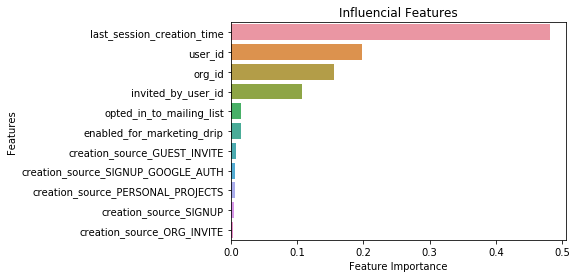

In [215]:
# Plot necessary features
plot=sns.barplot(x='feature importance',y='features',data=feature_to_keep)
plt.title('Influencial Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')